In [1]:
import pandas as pd

# Load the dataset
file_path = "MLE-Assignment.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df_info = df.info()
df_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [2]:
df_head = df.head()
df_head

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [3]:
df_missing = df.isnull().sum()
df_missing

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Drop hsi_id column
df_cleaned = df.drop(columns=["hsi_id"])

In [5]:
# Normalize spectral data (excluding the target variable)
features = df_cleaned.drop(columns=["vomitoxin_ppb"])
target = df_cleaned["vomitoxin_ppb"]

In [6]:
df_cleaned.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


In [7]:
# Standardization (z-score normalization)
features_normalized = (features - features.mean()) / features.std()

# Combine back with target
df_normalized = pd.concat([features_normalized, target], axis=1)


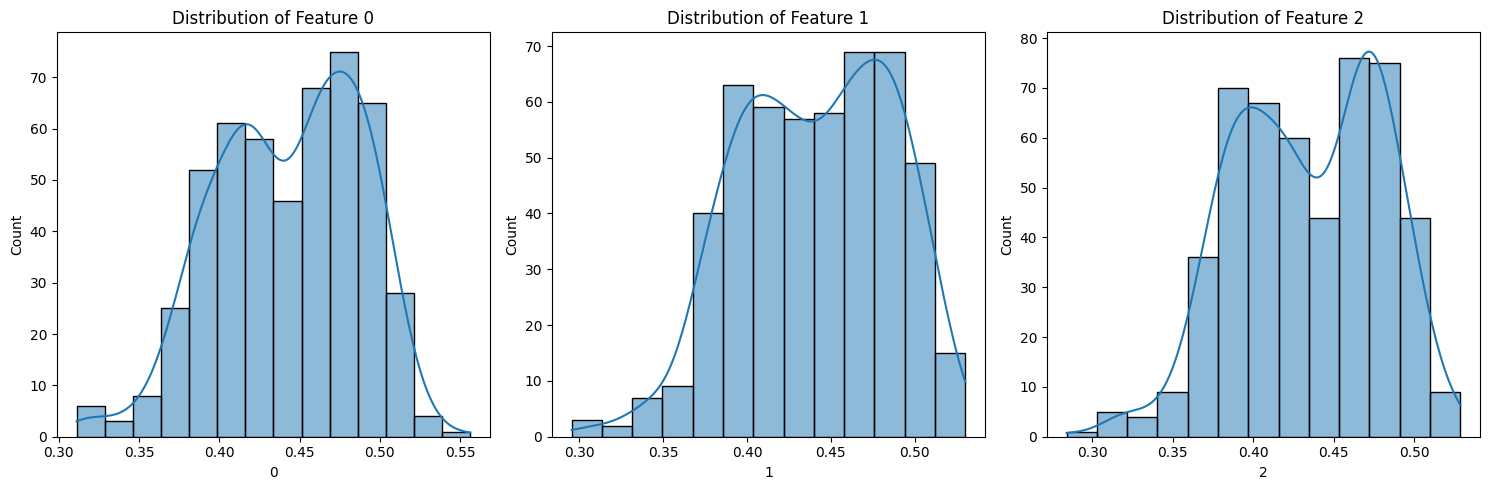

In [8]:
# Plot histograms for a few features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(features.columns[:3]):  # First 3 features
    sns.histplot(df_cleaned[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of Feature {col}")

plt.tight_layout()
plt.show()

No major anomalies detected in the first few features.

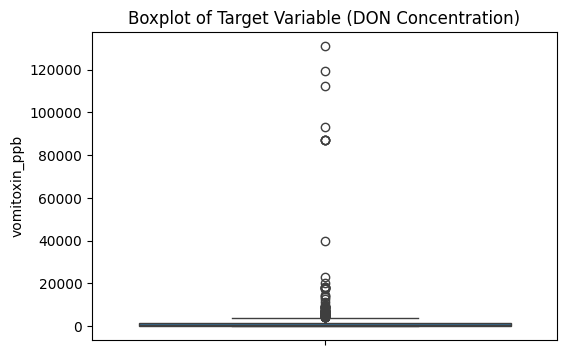

In [9]:
# Boxplot for the target variable
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_cleaned["vomitoxin_ppb"])
plt.title("Boxplot of Target Variable (DON Concentration)")
plt.show()

The boxplot suggests possible outliers. We may need to handle them carefully.

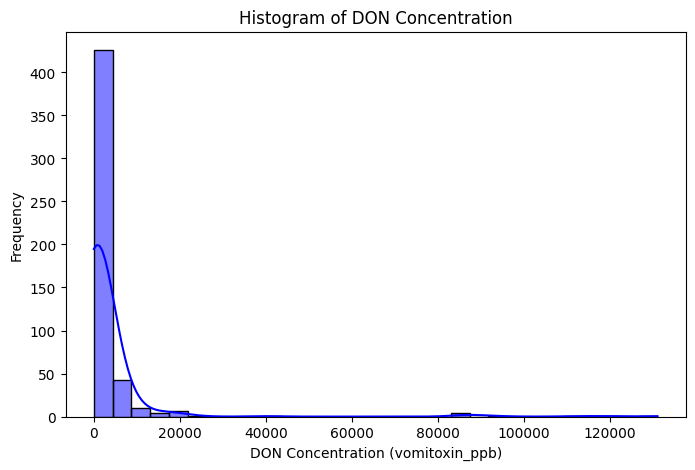

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for the target variable after outlier removal
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["vomitoxin_ppb"], bins=30, kde=True, color="blue")

plt.title("Histogram of DON Concentration")
plt.xlabel("DON Concentration (vomitoxin_ppb)")
plt.ylabel("Frequency")
plt.show()

In [11]:
# Compute percentiles for DON concentration
percentiles = np.percentile(df_cleaned["vomitoxin_ppb"], [90, 95, 98,  99, 99.5, 99.9])

# Display percentile thresholds
percentiles

array([  5800. ,   8920. ,  20060. ,  86900. , 102846.5, 125261.5])

In [12]:
# Count the number of samples with DON concentration above 20,060 ppb
num_extreme_outliers = df_cleaned[df_cleaned["vomitoxin_ppb"] > 20060].shape[0]
num_extreme_outliers

10

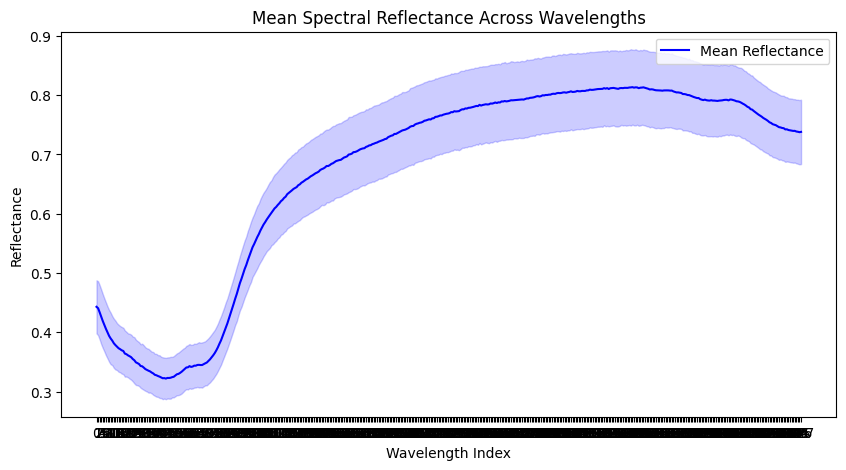

In [13]:
# Line plot for average reflectance over wavelengths
plt.figure(figsize=(10, 5))
plt.plot(features.mean(), label="Mean Reflectance", color="blue")
plt.fill_between(range(len(features.columns)), features.mean() - features.std(), 
                 features.mean() + features.std(), color='blue', alpha=0.2)
plt.title("Mean Spectral Reflectance Across Wavelengths")
plt.xlabel("Wavelength Index")
plt.ylabel("Reflectance")
plt.legend()
plt.show()

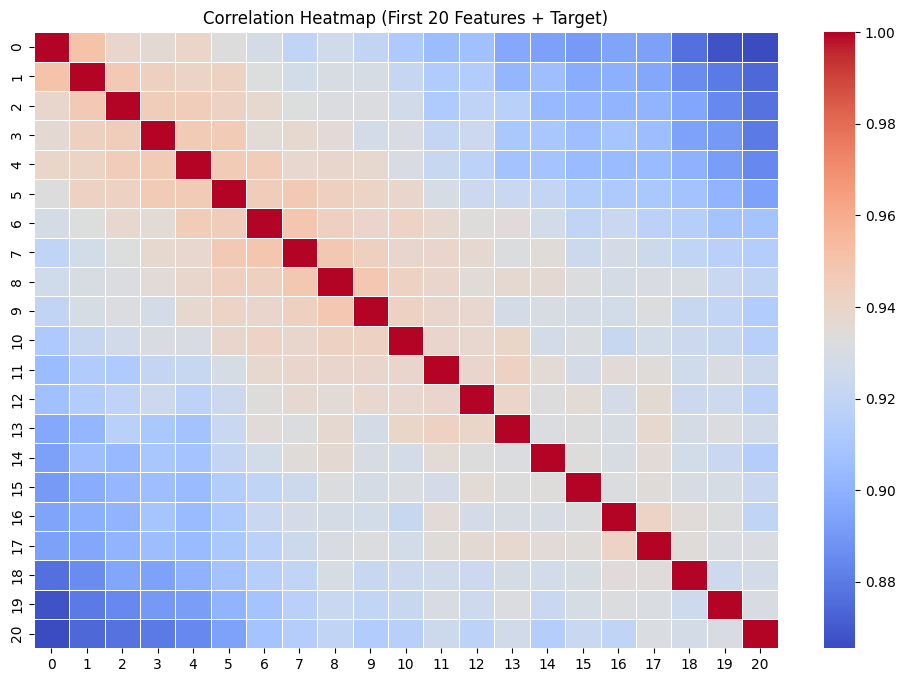

In [14]:
# Correlation heatmap (first 20 features + target for readability)
plt.figure(figsize=(12, 8))
corr_matrix = df_cleaned.iloc[:, :21].corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap (First 20 Features + Target)")
plt.show()


# first 20 features are highly correleated as the correleation coefficient is greater than 0.8

In [15]:
upper_bound = 20060
# Identify outliers
outliers = df_cleaned[(df_cleaned["vomitoxin_ppb"] >  upper_bound)]

# Count and display detected outliers
num_outliers = outliers.shape[0]
num_outliers, outliers.head()

(10,
             0         1         2         3         4         5         6  \
 80   0.460773  0.463556  0.434175  0.438172  0.433866  0.420138  0.415908   
 112  0.428913  0.417999  0.423014  0.435502  0.409847  0.416998  0.402489   
 117  0.401392  0.388340  0.374649  0.370445  0.356339  0.362410  0.342712   
 120  0.360911  0.365350  0.362183  0.338554  0.329039  0.330663  0.313815   
 205  0.466291  0.476235  0.456065  0.477684  0.460214  0.447743  0.444092   
 
             7         8         9  ...       439       440       441  \
 80   0.430765  0.402079  0.407874  ...  0.783267  0.786891  0.761165   
 112  0.404015  0.403642  0.386923  ...  0.760918  0.768607  0.757435   
 117  0.359716  0.350826  0.358953  ...  0.752605  0.749489  0.772589   
 120  0.327695  0.310658  0.324963  ...  0.691567  0.701916  0.699471   
 205  0.445662  0.418224  0.427486  ...  0.757299  0.779736  0.748597   
 
           442       443       444       445       446       447  vomitoxin_ppb  
 80

In [16]:
# Remove only upper outliers (values greater than the upper bound)
df_no_outliers = df_cleaned[df_cleaned["vomitoxin_ppb"] <= upper_bound]

# Display new dataset size and target variable statistics
new_size = df_no_outliers.shape[0]
new_target_stats = df_no_outliers["vomitoxin_ppb"].describe()

new_size, new_target_stats

(490,
 count      490.000000
 mean      1711.026531
 std       3159.047462
 min          0.000000
 25%        110.000000
 50%        500.000000
 75%       1475.000000
 max      20000.000000
 Name: vomitoxin_ppb, dtype: float64)

In [18]:
# Compute correlation of spectral features with target
correlation = df_no_outliers.corr()["vomitoxin_ppb"].drop("vomitoxin_ppb")

# Identify features with low correlation (absolute value < 0.1)
low_corr_features = correlation[abs(correlation) < 0.1].index

# Compute feature variance
feature_variance = df_no_outliers.drop(columns=["vomitoxin_ppb"]).var()

# Identify low-variance features (variance < 0.001 as a threshold)
low_variance_features = feature_variance[feature_variance < 0.001].index

# Display number of low-correlation and low-variance features
len(low_corr_features), len(low_variance_features)

(276, 0)

## Feature Engineering Insights
- Low-Correlation Features: 183 spectral bands have very weak correlation (|r| < 0.1) with DON concentration. These may be uninformative.

- Low-Variance Features: 0 features have extremely low variance (< 0.001), meaning all features have some variability.

# Reducing dimension using PCA

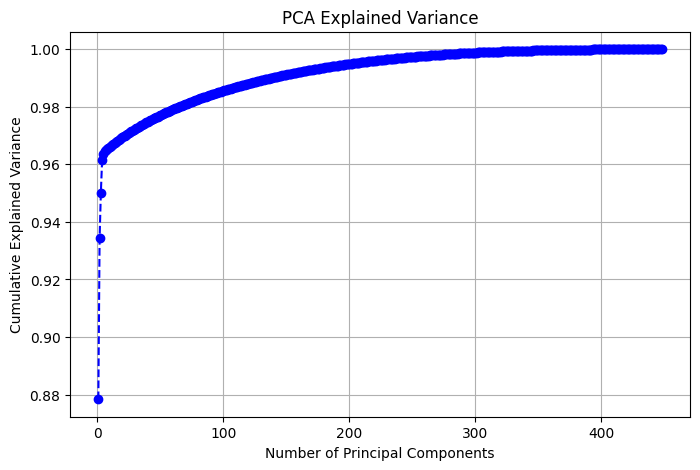

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Separate features and target
X = df_no_outliers.drop(columns=["vomitoxin_ppb"])
y = df_no_outliers["vomitoxin_ppb"]

# Standardize the features (zero mean, unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (retain all components initially)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot variance explained by principal components
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()


## PCA Explained Variance Analysis
- The plot shows how much variance each principal component explains cumulatively.

- We can choose the number of components based on a variance threshold (e.g., 95% or 99% of the total variance).

In [26]:
# Apply PCA with 200 components
pca_200 = PCA(n_components=200)
X_pca_200 = pca_200.fit_transform(X_scaled)

# Check the total variance explained by 200 components
variance_explained_200 = np.sum(pca_200.explained_variance_ratio_)
variance_explained_200


0.994904512405789

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_pca_200, df_no_outliers["vomitoxin_ppb"], test_size=0.2, random_state=42)

# Initialize models
mlp = MLPRegressor(hidden_layer_sizes=(128, 128, 64, 64, 32, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)
rf = RandomForestRegressor(n_estimators=10000, random_state=42)
xgb = XGBRegressor(n_estimators=10000, learning_rate=0.01, max_depth=6, random_state=42)
linearreg = LinearRegression()
# Train models
mlp.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
linearreg.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_lg = linearreg.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {"Model": model_name, "MAE": mae, "RMSE": rmse, "R²": r2}

mlp_results = evaluate_model(y_test, y_pred_mlp, "MLP Neural Network")
rf_results = evaluate_model(y_test, y_pred_rf, "Random Forest")
xgb_results = evaluate_model(y_test, y_pred_xgb, "XGBoost")
lg_results = evaluate_model(y_test, y_pred_lg, "Linear Regression")
# Combine results
results = [mlp_results, rf_results, xgb_results]
results


[{'Model': 'MLP Neural Network',
  'MAE': 1480.6886368223288,
  'RMSE': 2700.6633418650413,
  'R²': -0.034802813983266345},
 {'Model': 'Random Forest',
  'MAE': 1389.7188448979593,
  'RMSE': 2172.3265681763933,
  'R²': 0.33047479727215323},
 {'Model': 'XGBoost',
  'MAE': 1359.6724627747828,
  'RMSE': 2261.073148398697,
  'R²': 0.2746528196701492}]

In [28]:
mlp1 = MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam', max_iter=5000, random_state=42)
mlp1.fit(X_train, y_train)
y_pred_mlp1 = mlp1.predict(X_test)
mlp_results1 = evaluate_model(y_test, y_pred_mlp1, "MLP Neural Network")
mlp_results1

{'Model': 'MLP Neural Network',
 'MAE': 1694.8190520862072,
 'RMSE': 2966.587111856044,
 'R²': -0.2486218007206893}

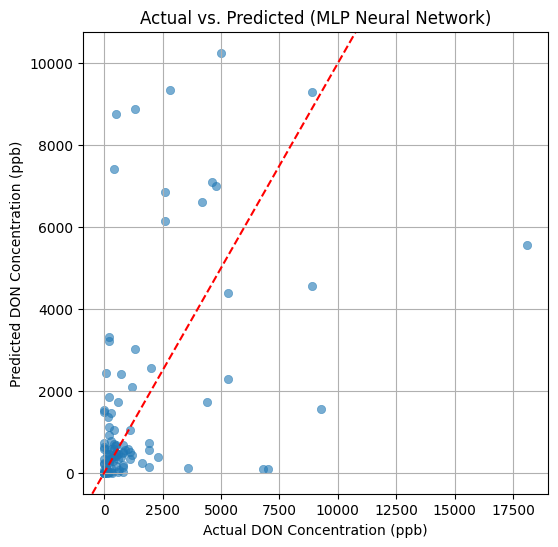

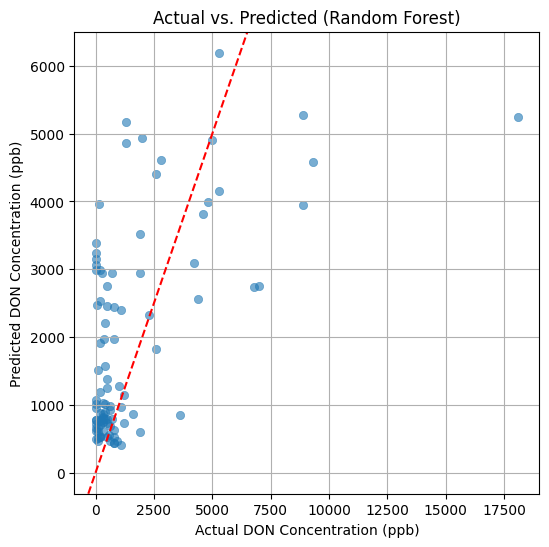

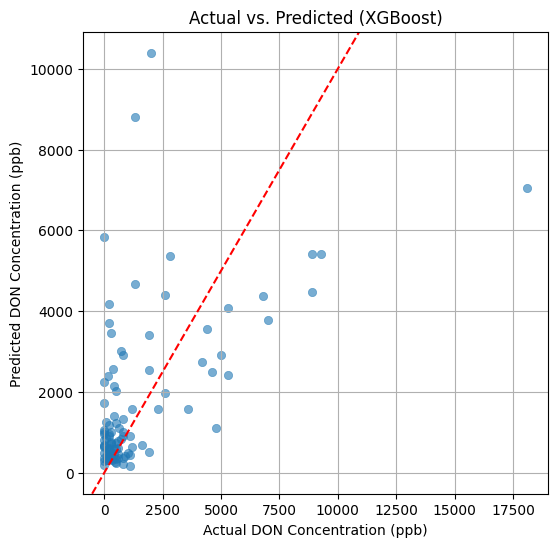

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot function
def plot_scatter(y_true, y_pred, model_name):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6, edgecolor=None)
    plt.xlabel("Actual DON Concentration (ppb)")
    plt.ylabel("Predicted DON Concentration (ppb)")
    plt.title(f"Actual vs. Predicted ({model_name})")
    plt.axline([0, 0], slope=1, color="red", linestyle="--")  # Perfect prediction line
    plt.grid(True)
    plt.show()

# Scatter plots for all models
plot_scatter(y_test, y_pred_mlp, "MLP Neural Network")
plot_scatter(y_test, y_pred_rf, "Random Forest")
plot_scatter(y_test, y_pred_xgb, "XGBoost")


In [ ]:
jhjg 